# Exploring the UCI ML Repository: Heart Disease Dataset

In [50]:
# Retrieve the data
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data <- read.csv(url, header=FALSE)
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


The dataset above has 14 columns but no column names.

In [51]:
# Assign column names
colnames(data) <- c("age",
                    "sex",# 0 = female, 1 = male
                    "cp", # chest pain
                    # 1 = typical angina,
                    # 2 = atypical angina,
                    # 3 = non-anginal pain,
                    # 4 = asymptomatic
                    "trestbps", # resting blood pressure (in mm Hg)
                    "chol", # serum cholestoral in mg/dl
                    "fbs", # fasting blood sugar greater than 120 mg/dl, 1 = TRUE, 0 = FALSE
                    "restecg", # resting electrocardiographic results
                        # 1 = normal
                    # 2 = having ST-T wave abnormality
                    # 3 = showing probable or definite left ventricular hypertrophy
                    "thalach", # maximum heart rate achieved
                    "exang", # exercise induced angina, 1 = yes, 0 = no
                    "oldpeak", # ST depression induced by exercise relative to rest
                    "slope", # the slope of the peak exercise ST segment
                    # 1 = upsloping
                    # 2 = flat
                    # 3 = downsloping
                    "ca", # number of major vessels (0-3) colored by fluoroscopy
                    "thal", # this is short of thalium heart scan
                    # 3 = normal (no cold spots)
                    # 6 = fixed defect (cold spots during rest and exercise)
                    # 7 = reversible defect (when cold spots only appear during exercise)
                    "hd" # (the predicted attribute) - diagnosis of heart disease
                    # 0 if less than or equal to 50% diameter narrowing
                    # 1 if greater than 50% diameter narrowing
                    )
head(data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Corresponding column names are now assigned. Next, I will check for any missing information and data type of each column.

In [52]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


I need to process the data such that it replaces the missing values is NAs and converts each column to an appropriate data type.

In [53]:
# Replace,"?"s with NAs
data[data == "?"] <- NA
 
# Add factors for factor variables 
data[data$sex == 0,]$sex <- "F"
data[data$sex == 1,]$sex <- "M"

data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp) 
data$fbs <- as.factor(data$fbs) 
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang) 
data$slope <- as.factor(data$slope)
 
data$ca <- as.integer(data$ca) 
data$ca <- as.factor(data$ca) 
 
data$thal <- as.integer(data$thal)
data$thal <- as.factor(data$thal)
 
# Replace 0 and 1 with "Healthy" and "Unhealthy"
data$hd <- ifelse(test=data$hd == 0, yes="Healthy", no="Unhealthy")
data$hd <- as.factor(data$hd) 

In [54]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "2","3","4","5": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "2","3","4": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


I will now impute the missing values using the randomForest library.

In [55]:
options(warn=-1)
library(randomForest)
set.seed(123)
data.imputed <- rfImpute(hd ~ ., data = data, iter=6)    # Run 6 iterations

ntree      OOB      1      2
  300:  19.14% 15.85% 23.02%
ntree      OOB      1      2
  300:  15.51% 11.59% 20.14%
ntree      OOB      1      2
  300:  18.81% 15.85% 22.30%
ntree      OOB      1      2
  300:  16.50% 11.59% 22.30%
ntree      OOB      1      2
  300:  17.16% 12.20% 23.02%
ntree      OOB      1      2
  300:  17.49% 14.02% 21.58%


Random Forests uses bootstrapped data, and hence splits the data into "training" and "test" sets. The "training" dataset is the bootstrapped data and the "test" dataset is the remaining samples, also known as the "Out-Of-Bag" data.

In [56]:
# Split data into training and test sets
set.seed(1234)
train = sample(1:nrow(data.imputed),nrow(data.imputed)/2)
test = -train
training_data = data.imputed[train,]
testing_data = data.imputed[test,]
testing_hd = data.imputed$hd[test]

I will construct both unpruned and pruned trees for the dataset, and check prediction accuracies for both.

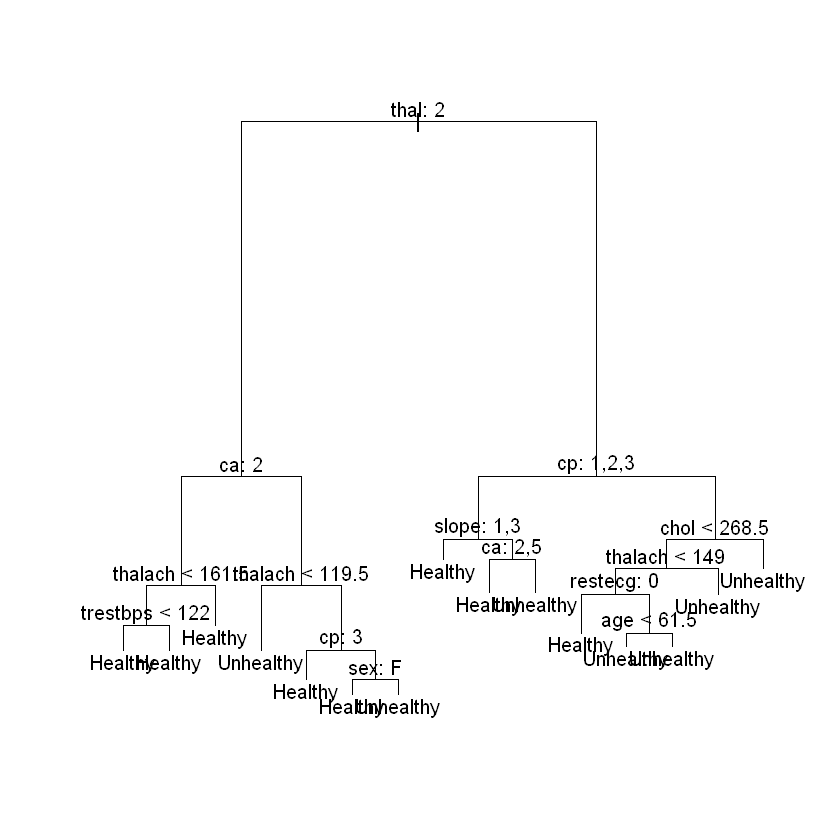

In [57]:
# Run a model for unpruned tree
library(tree)
tree_model = tree(hd~.,data=training_data)
plot(tree_model)
text(tree_model,pretty=0)  

In [58]:
# Check how the model is doing using the test data
tree_predict = predict(tree_model, testing_data, type="class")
mean(tree_predict != testing_hd)

[1] 0.2565789

The error rate is 25.66%.

In [59]:
# Print the confusion Matrix
table(tree_predict, testing_hd)

            testing_hd
tree_predict Healthy Unhealthy
   Healthy        74        30
   Unhealthy       9        39

In [60]:
# Compute the prediction Accuracy
(74+40)/(74+29+9+40)

[1] 0.75

The prediction accuracy is 75%.

In [61]:
set.seed(234789)
cv.tree = cv.tree(tree_model,FUN=prune.misclass)
cv.tree

$size
[1] 15 11  8  6  4  2  1

$dev
[1] 42 43 43 40 39 31 70

$k
[1]       -Inf  0.0000000  0.3333333  1.0000000  1.5000000  3.0000000 40.0000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

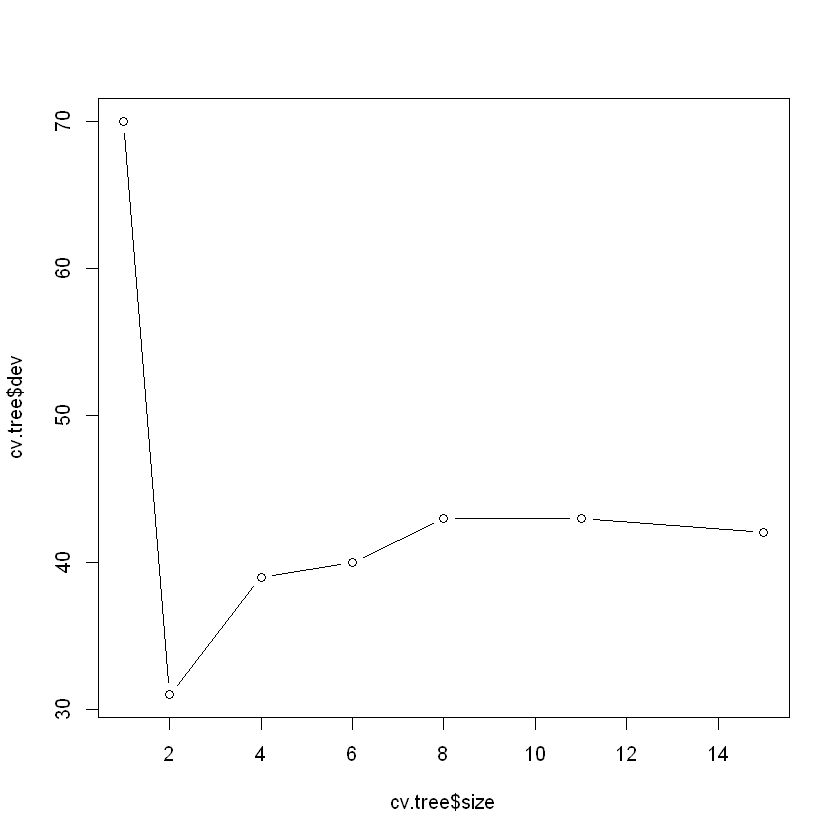

In [62]:
plot(cv.tree$size, cv.tree$dev, type="b")

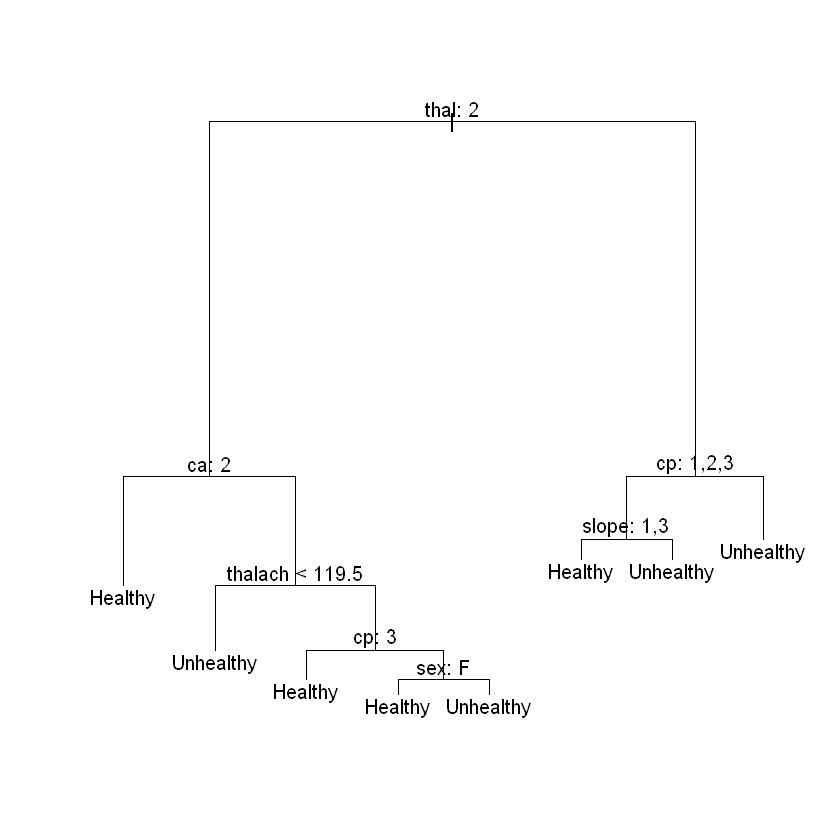

In [63]:
# Prune the tree
pruned_model = prune.misclass(tree_model, best=7)
plot(pruned_model)
text(pruned_model,pretty=0)

In [64]:
# Check how the model is doing on the test data
tree_pred = predict(pruned_model, testing_data, type="class")
mean(tree_pred != testing_hd)

[1] 0.1776316

The error rate is 17.76%.

In [65]:
# Print the confusion matrix
table(tree_pred, testing_hd)

           testing_hd
tree_pred   Healthy Unhealthy
  Healthy        72        16
  Unhealthy      11        53

In [66]:
# Compute the prediction accuracy
(72+53)/(72+16+11+53)

[1] 0.8223684

The prediction accuracy is 82.24%.

The prediction accuracy is overall better with the pruned tree model as compared to the unpruned tree model.

We will now test other classification methods on the data: bagging and random forest.

In [25]:
# Bagging
set.seed(14)
bag.data = randomForest(hd~., data=data.imputed, subset=train, mtry=13, importance=TRUE)
bag_predict = predict(bag.data, testing_data, type="class")
mean(bag_predict != testing_hd)

[1] 0.1907895

The error rate with bagging is 19.08%.

In [67]:
# Random Forest
set.seed(15)
rf.data = randomForest(hd~., data=data.imputed, subset=train, mtry=4, importance=TRUE,proximity=TRUE)
rf_predict = predict(rf.data, testing_data, type="class")
mean(rf_predict != testing_hd)

[1] 0.1710526

The error rate with random forest is 17.1%.

I will now calculate the prediction error with each of the above methods.

In [68]:
# Bagging
bag.data$err.rate[500,1]

OOB 
0.2119205

The OOB error rate for bagging is 21.19%.

In [69]:
# Random Forest
rf.data$err.rate[500,1]

OOB 
0.1721854

The OOB error rate for random forest is 17.22%.

We will now compare error rates for Random Forest model OOB, healthy and unhealthy patients as a function of the number of trees.

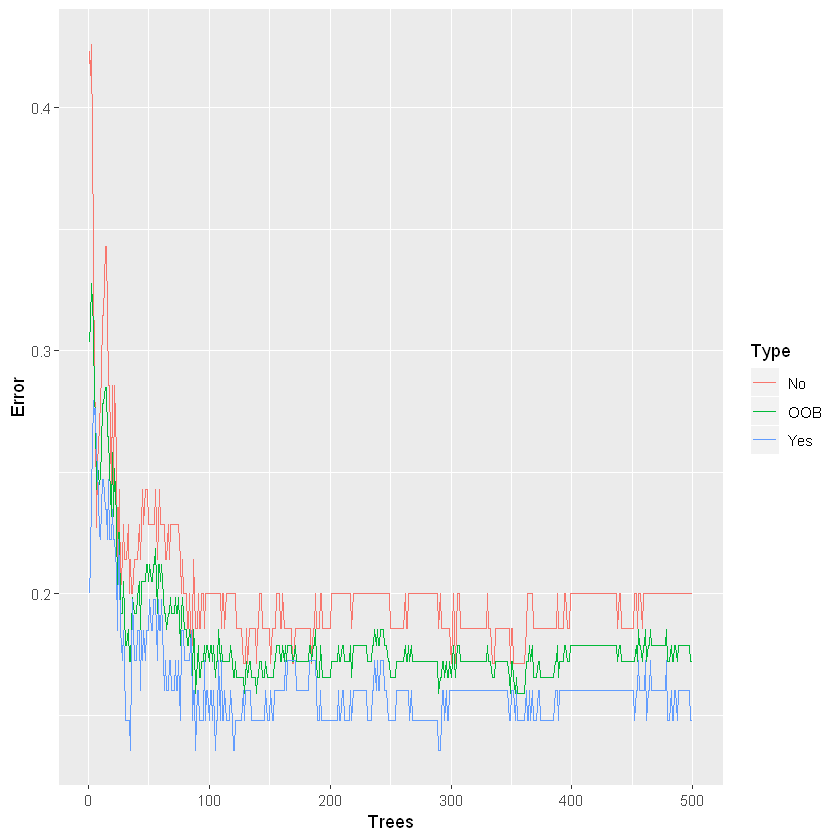

In [70]:
library(ggplot2)
oob.error.data <- data.frame(Trees=rep(1:nrow(rf.data$err.rate), times=3),
Type = rep(c("OOB", "No", "Yes"), each=nrow(rf.data$err.rate)),
Error = c(rf.data$err.rate[,"OOB"],
rf.data$err.rate[,"Unhealthy"],
rf.data$err.rate[,"Healthy"]))
ggplot(data = oob.error.data, aes(x = Trees, y = Error)) + geom_line(aes(color = Type))

I will now check the variable importance for each classification method.

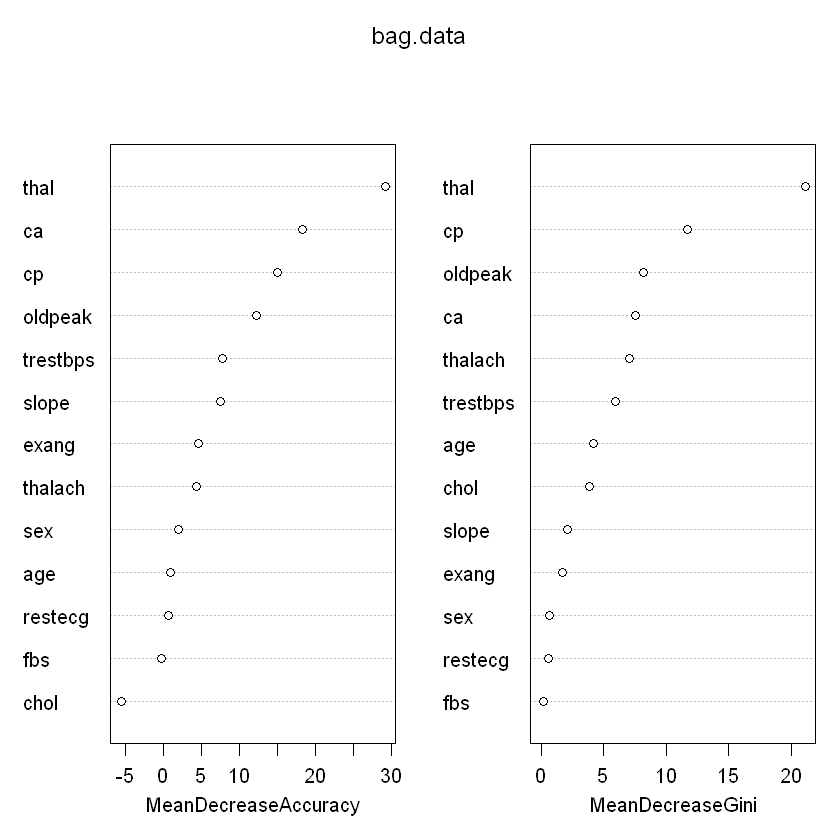

In [71]:
# Bagging
varImpPlot(bag.data)

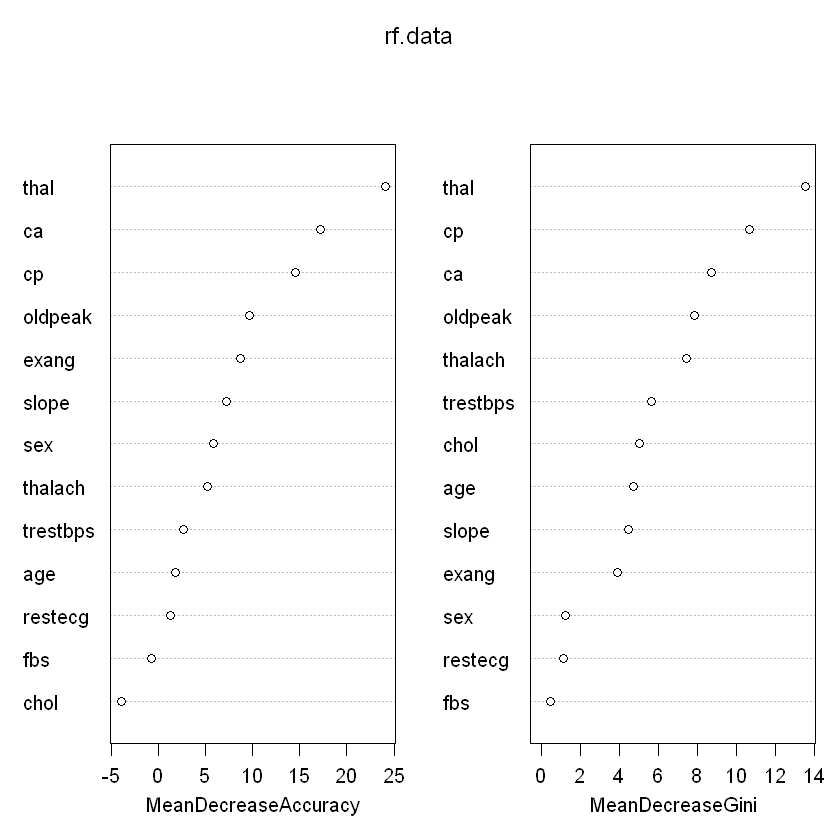

In [72]:
# Random Forest
varImpPlot(rf.data)

The variables thal (thalium heart scan), ca (number of major vessels colored by fluoroscopy), and cp (chest pain) are the most important at predicting CHD.

I will now use MDS in order to assess the clusters of healthy and unhealthy cases with PCA.

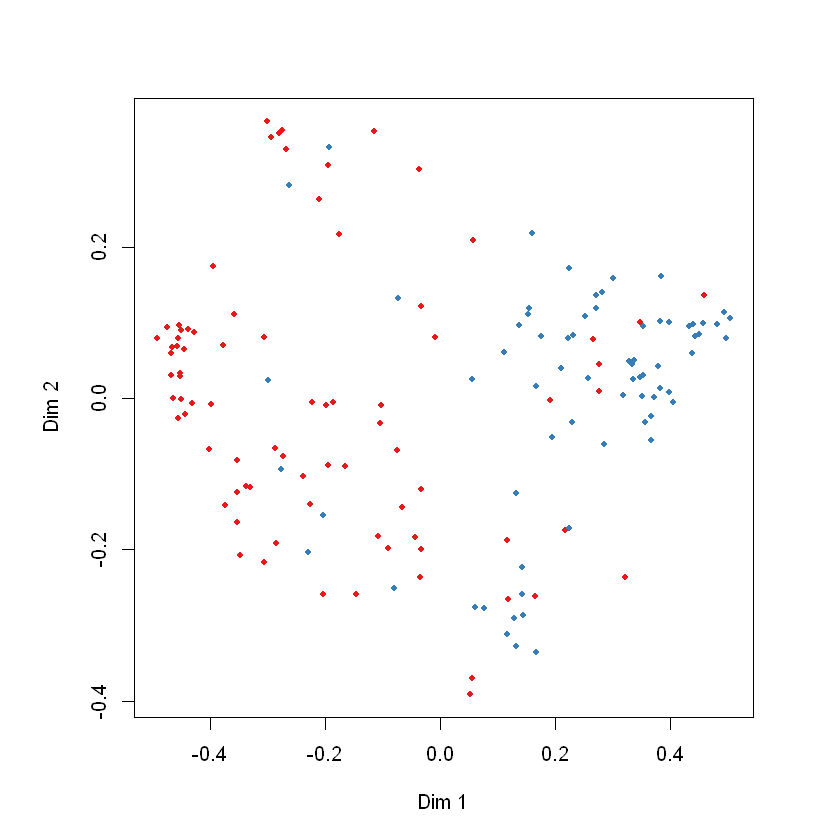

In [73]:
MDSplot(rf.data, training_data$hd)

I will further use the adaboosting model to check the performance of the data.

In [74]:
# Adaboost
library(fastAdaboost)
test_adaboost <- adaboost(hd~., training_data, nIter=10)
ad.pred <- predict(test_adaboost, newdata = testing_data)
ad.pred$error

[1] 0.2039474

The error rate is 20.39%.

In [75]:
# Confusion matrix
table1 <- table(Predicted = pred$class, Actual = testing_data$hd)
table1

           Actual
Predicted   Healthy Unhealthy
  Healthy        70        18
  Unhealthy      13        51

In [76]:
# Prediction Accuracy
(70+51)/(70+18+13+51)

[1] 0.7960526

The prediction accuracy is 79.6%.

Comparing all the models, i.e. unpruned tree, pruned tree, bagging, random forest, and adaboosting, I get the lowest error rate with random forest. It is fairly close to the prediction obtained from the pruned model. 